In [1]:
# Install the required libraries
!pip install prophet

In [26]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Upload the scarf-google-trends-data.csv file
from google.colab import files
uploaded = files.upload()

Saving networth_table_clean.csv to networth_table_clean.csv


In [3]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
wealth_gap_df = pd.read_csv("networth_table_clean.csv")
wealth_gap_df.set_index('Year (Q4)', inplace=True)
wealth_gap_df = wealth_gap_df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)


# Review the DataFrame
wealth_gap_df.head(50)

,BabyBoom,GenX,Millennial,Silent
Year (Q4),,,,
1989,59642.0,1806.0,0.0,208044.0
1990,61561.0,2423.0,0.0,215243.0
1991,69911.0,3534.0,0.0,231121.0
1992,78361.0,4619.0,0.0,241286.0
1993,88424.0,7119.0,0.0,253392.0
1994,97209.0,8135.0,0.0,261669.0
1995,113557.0,10374.0,0.0,279367.0
1996,127640.0,13359.0,0.0,296417.0
1997,148059.0,19631.0,0.0,320125.0


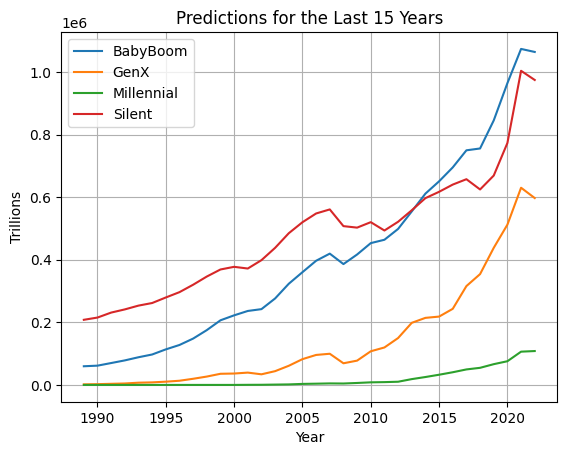

In [29]:
# Plot the general trends
wealth_gap_df.plot()

plt.title('Predictions for the Last 15 Years')
plt.xlabel('Year')
plt.ylabel('Trillions')
plt.grid(True)
plt.show()

In [5]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
wealth_gap_prophet_df_update = wealth_gap_df.reset_index()
wealth_gap_prophet_df_babyboom = wealth_gap_prophet_df_update[["Year (Q4)", "BabyBoom"]]
wealth_gap_prophet_df_genx = wealth_gap_prophet_df_update[["Year (Q4)","GenX"]]
wealth_gap_prophet_df_millennial = wealth_gap_prophet_df_update[["Year (Q4)","Millennial"]]
# wealth_gap_prophet_df_silent = wealth_gap_prophet_df_update["Silent"]

# Label the columns ds and y so that the syntax is recognized by Prophet
wealth_gap_prophet_df_genx.columns = ['ds', 'y']
wealth_gap_prophet_df_babyboom.columns = ['ds', 'y']
wealth_gap_prophet_df_millennial.columns = ['ds', 'y']

# change to date time object
wealth_gap_prophet_df_genx['ds'] = pd.to_datetime(wealth_gap_prophet_df_genx['ds'], format='%Y')
wealth_gap_prophet_df_babyboom['ds'] = pd.to_datetime(wealth_gap_prophet_df_babyboom['ds'], format='%Y')
wealth_gap_prophet_df_millennial['ds'] = pd.to_datetime(wealth_gap_prophet_df_millennial['ds'], format='%Y')
# wealth_gap_prophet_df_genx



<ipython-input-5-17c304e08df5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_gap_prophet_df_genx['ds'] = pd.to_datetime(wealth_gap_prophet_df_genx['ds'], format='%Y')
<ipython-input-5-17c304e08df5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_gap_prophet_df_babyboom['ds'] = pd.to_datetime(wealth_gap_prophet_df_babyboom['ds'], format='%Y')
<ipython-input-5-17c304e08df5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [6]:
# Create a Prophet model for gen x
model_genx = Prophet()

In [7]:
# Create a Prophet model for Boomer
model_boomer = Prophet()

In [9]:
# Create a Prophet model for millennial
model_millennial = Prophet()

In [ ]:
# wealth_gap_prophet_df_genx.columns = ['ds', 'y']
# wealth_gap_prophet_df_babyboom.columns = ['ds', 'y']
# wealth_gap_prophet_df_millennial.columns = ['ds', 'y']

In [10]:
# Fit the Gen X Prophet model
model_genx.fit(wealth_gap_prophet_df_genx)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/411jbpye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/ch9xepgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14481', 'data', 'file=/tmp/tmp50msgspe/411jbpye.json', 'init=/tmp/tmp50msgspe/ch9xepgv.json', 'output', 'file=/tmp/tmp50msgspe/prophet_model3x37sa5n/prophet_model-20240514035839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:58:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Fit the Boomer Prophet model
model_boomer.fit(wealth_gap_prophet_df_babyboom)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/8bvuuvtj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/peatbbqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36237', 'data', 'file=/tmp/tmp50msgspe/8bvuuvtj.json', 'init=/tmp/tmp50msgspe/peatbbqg.json', 'output', 'file=/tmp/tmp50msgspe/prophet_modelwp77kb6b/prophet_model-20240514035842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:58:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
# Fit the Millenial Prophet model
model_millennial.fit(wealth_gap_prophet_df_millennial)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/xekkns3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/a0ph6k3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93738', 'data', 'file=/tmp/tmp50msgspe/xekkns3r.json', 'init=/tmp/tmp50msgspe/a0ph6k3b.json', 'output', 'file=/tmp/tmp50msgspe/prophet_modellp4pb2j0/prophet_model-20240514035844.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Forecast 15 years of weekly future trends data for Gen X
future_genx = model_genx.make_future_dataframe(periods=15, freq='Y')
future_millenial = model_millennial.make_future_dataframe(periods=15, freq='Y')
future_boomer = model_boomer.make_future_dataframe(periods=15, freq='Y')

# Display the last five rows
future_boomer.tail()

,ds
44,2032-12-31
45,2033-12-31
46,2034-12-31
47,2035-12-31
48,2036-12-31


In [14]:
# Make predictions for Canada using the future_canada DataFrame
forecast_genx = model_genx.predict(future_genx)

# Display the first five rows of the forecast_canada DataFrame
forecast_genx

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1989-01-01,18590.122156,-202923.263137,13750.247327,18590.122156,18590.122156,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,0.0,0.0,0.0,-90856.998948
1,1990-01-01,33814.419792,-200939.794252,22340.883936,33814.419792,33814.419792,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,0.0,0.0,0.0,-87982.693292
2,1991-01-01,49038.717432,-192883.795548,41433.253472,49038.717432,49038.717432,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,0.0,0.0,0.0,-84584.317562
3,1992-01-01,64263.015074,-197198.697001,36610.814846,64263.015074,64263.015074,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,0.0,0.0,0.0,-80647.315434
4,1993-01-01,79529.023118,-147529.618863,74708.115175,79529.023118,79529.023118,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,0.0,0.0,0.0,-29918.097987
5,1994-01-01,94753.320758,-137607.698901,88075.057241,94753.320758,94753.320758,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,0.0,0.0,0.0,-27043.792326
6,1995-01-01,109977.618400,-140022.235364,81706.272048,109977.618400,109977.618400,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,0.0,0.0,0.0,-23645.416594
7,1996-01-01,125201.916045,-121733.060313,97611.630472,125201.916045,125201.916045,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,0.0,0.0,0.0,-19708.414463
8,1997-01-01,140467.924096,-78941.158806,148409.018967,140467.924096,140467.924096,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,0.0,0.0,0.0,31020.802991
9,1998-01-01,155692.221746,-75761.479948,142582.315017,155692.221746,155692.221746,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,0.0,0.0,0.0,33895.108662


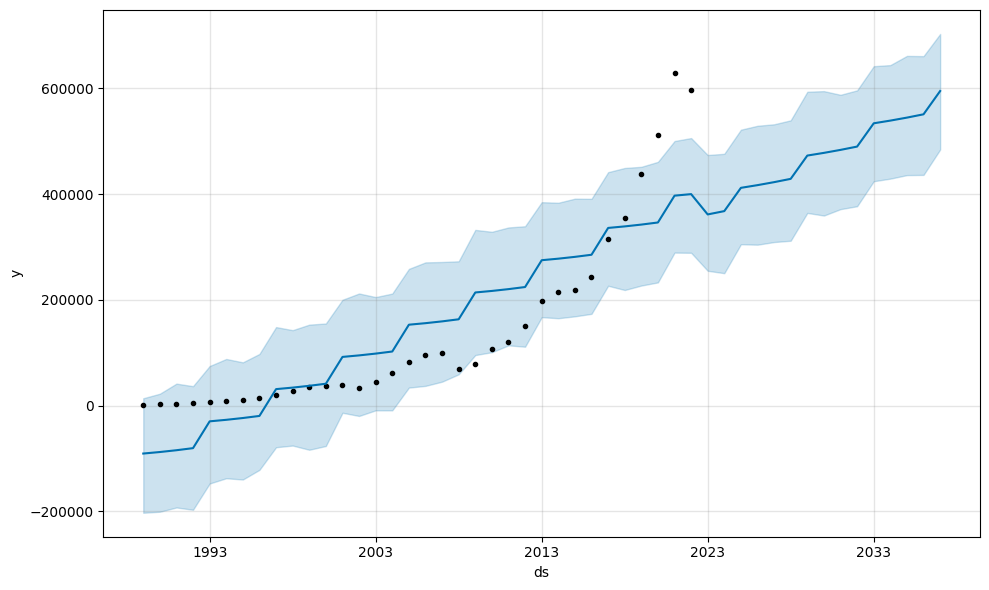

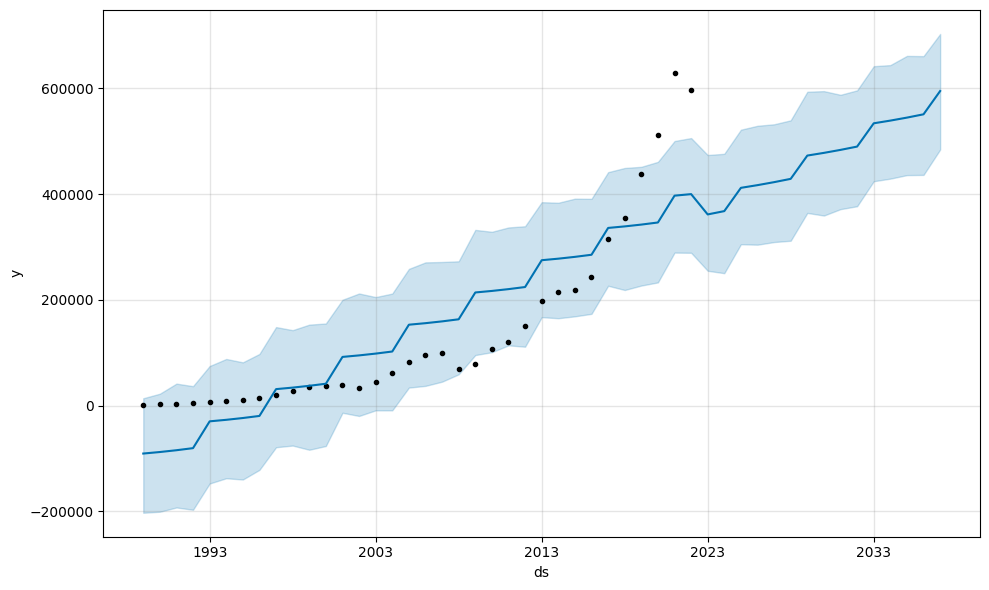

In [15]:
# Plot the Prophet predictions for genx
model_genx.plot(forecast_genx)

In [16]:
# Set the index in the forecast_canada DataFrame to the ds datetime column
forecast_genx = forecast_genx.set_index('ds')

# Display the forecast_canada DataFrame
forecast_genx.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2032-12-31,689597.283153,424326.720403,641978.320719,689561.383070,689632.317302,-155645.341770,-155645.341770,-155645.341770,-155645.341770,-155645.341770,-155645.341770,0.0,0.0,0.0,533951.941383
2033-12-31,704850.051318,429228.678532,644064.423690,704808.977898,704889.752140,-165815.329056,-165815.329056,-165815.329056,-165815.329056,-165815.329056,-165815.329056,0.0,0.0,0.0,539034.722262
2034-12-31,720102.819483,435905.265161,661446.180183,720057.339691,720147.789526,-175408.488923,-175408.488923,-175408.488923,-175408.488923,-175408.488923,-175408.488923,0.0,0.0,0.0,544694.330560
2035-12-31,735355.587648,436296.839135,660997.148608,735304.900018,735405.581297,-184413.970804,-184413.970804,-184413.970804,-184413.970804,-184413.970804,-184413.970804,0.0,0.0,0.0,550941.616844
2036-12-31,750650.144219,484283.657849,702991.160664,750593.643263,750706.652406,-155645.341770,-155645.341770,-155645.341770,-155645.341770,-155645.341770,-155645.341770,0.0,0.0,0.0,595004.802450


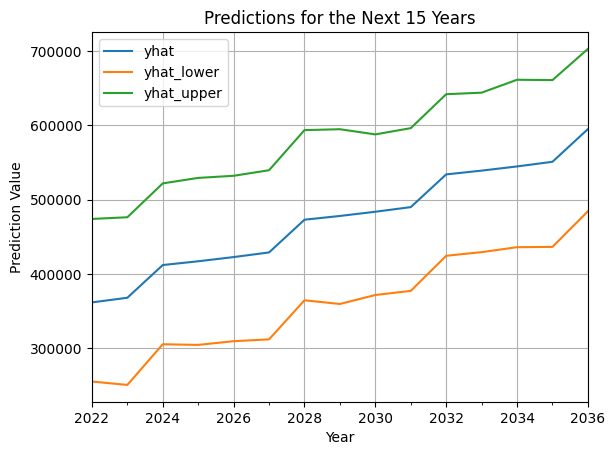

In [25]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period
# forecast_genx[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-15:,:].plot()

# last_15_years =
forecast_genx[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-15:].plot()
# forecast_genx[['yhat', 'yhat_lower', 'yhat_upper']].plot()

plt.title('Predictions for the Next 15 Years')
plt.xlabel('Year')
plt.ylabel('Prediction Value')
plt.grid(True)
plt.show()

In [22]:
# Reset the index in the forecast_canada DataFrame
forecast_genx_reset_i = forecast_genx.reset_index()
forecast_genx_reset_i
# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame


# forecast_genx_reset_i =
# model_genx.plot_components(forecast_genx_reset_i)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1989-01-01,18590.122156,-202923.263137,13750.247327,18590.122156,18590.122156,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,0.0,0.0,0.0,-90856.998948
1,1990-01-01,33814.419792,-200939.794252,22340.883936,33814.419792,33814.419792,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,0.0,0.0,0.0,-87982.693292
2,1991-01-01,49038.717432,-192883.795548,41433.253472,49038.717432,49038.717432,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,0.0,0.0,0.0,-84584.317562
3,1992-01-01,64263.015074,-197198.697001,36610.814846,64263.015074,64263.015074,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,0.0,0.0,0.0,-80647.315434
4,1993-01-01,79529.023118,-147529.618863,74708.115175,79529.023118,79529.023118,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,0.0,0.0,0.0,-29918.097987
5,1994-01-01,94753.320758,-137607.698901,88075.057241,94753.320758,94753.320758,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,0.0,0.0,0.0,-27043.792326
6,1995-01-01,109977.618400,-140022.235364,81706.272048,109977.618400,109977.618400,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,-133623.034994,0.0,0.0,0.0,-23645.416594
7,1996-01-01,125201.916045,-121733.060313,97611.630472,125201.916045,125201.916045,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,-144910.330508,0.0,0.0,0.0,-19708.414463
8,1997-01-01,140467.924096,-78941.158806,148409.018967,140467.924096,140467.924096,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,-109447.121105,0.0,0.0,0.0,31020.802991
9,1998-01-01,155692.221746,-75761.479948,142582.315017,155692.221746,155692.221746,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,-121797.113084,0.0,0.0,0.0,33895.108662
